In [5]:
import numpy as np
import pandas as pd
import datetime
import glob
import os
 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.dates 
from matplotlib.ticker import MultipleLocator, FuncFormatter, NullFormatter
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

import analyze_log_functions as alf

# Import data 

In [6]:
path = os.path.join( os.getcwd()   , 'log_files\\') 
log_files = glob.glob( path+ '*.csv')  

df = pd.DataFrame()
for file in log_files :
    df_temp = pd.read_csv( file, index_col=None, header=0)  
    df = df.append(df_temp ,sort=False)   
    
df.tail()

,date,start time,Task,Label,Duration (s)
186,2020/04/19,18:13:21,NaN,Other,0
187,2020/04/19,18:13:22,NaN,Other,0
188,2020/04/19,18:13:23,NaN,Other,0
189,2020/04/19,18:20:16,NaN,Other,2
190,2020/04/19,18:20:22,NaN,Other,1


# Data conversion

In [10]:
# remove all items shorter than 60 seconds
bool_short_duration = df['Duration (s)'] < 60
df = df[~bool_short_duration]

df['date'] = pd.to_datetime(df['date'] )  
df['Duration (hh:mm:ss)'] = pd.to_timedelta(df['Duration (s)'],'s')
df.tail()
df['Week'] = df['date'].dt.strftime("%V")

 # Set plotting parameters

In [6]:
# make colorscheme 
cols = np.array([[166,206,227], 
[31,120,180], 
[178,223,138], 
[51,160,44], 
[251,154,153], 
[227,26,28], 
[253,191,111], 
[255,127,0], 
[202,178,214], 
[106,61,154], 
[255,255,153]]) /255  

labels = df['Label'].unique()     
label_dict = {}
for label,col in zip(labels,cols): 
    label_dict[label] = col 

# Plot tracked time for multiple weeks

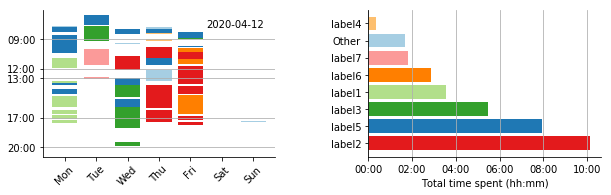

In [7]:
weeks = df['Week'].unique()  

fig, ax= plt.subplots( len(weeks), 2, figsize =(10,3),squeeze=False) 

for i, week in enumerate(weeks):  
    bool_week = df['Week'] == week
    df_week = df[bool_week].copy() 
    
    # plot left axis
    alf.plot_week_tasks( ax[i,0], df_week, label_dict )
    alf.plot_time_spent_weekly( ax[i,1], df_week, label_dict )
      
plt.subplots_adjust(left=None, bottom=.2, right=None, top=None, wspace=.4, hspace=None)

# Plot tracked time for a single week

Saving to: figs\week_analysis.png


,Total time logged
date,
2020-04-13,06:39:12
2020-04-14,04:32:19
2020-04-15,07:19:26
2020-04-16,07:28:17
2020-04-17,07:50:13
2020-04-19,00:02:35


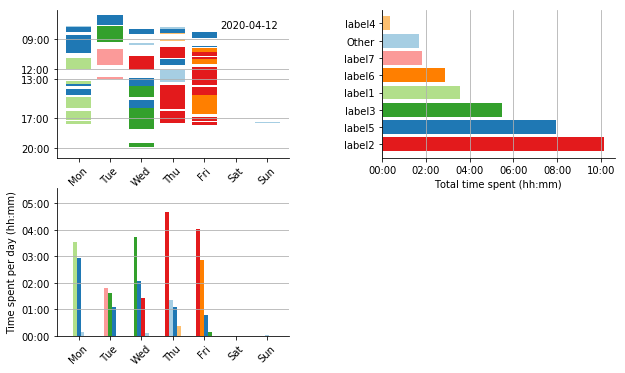

In [13]:
bool_week = df['Week'] == weeks[0]
df_week = df[bool_week].copy() 

fig, ax = plt.subplots(2, 2, squeeze=False, figsize =(10,6))

# plot 3 subplots
alf.plot_week_tasks( ax[0,0], df_week, label_dict ) 
alf.plot_time_spent_weekly(ax[0,1], df_week, label_dict  )
alf.plot_time_spent_daily( ax[1,0], df_week, label_dict  ) 
  
# adjust layout 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None) 

# remove unused lower right axes object 
ax[1,1].axes.remove()

# save figure
fig_fullname = os.path.join( 'figs', 'week_analysis') 
print('Saving to: ' + fig_fullname + '.png') 
plt.savefig( fig_fullname+ '.png',
        format='png', dpi=300,
        transparent=  True,             
        bbox_inches = 'tight', pad_inches = 0, 
           )

# print out summary data
summed = df_week.groupby('date').sum() 
summed['Total time logged']= pd.to_timedelta( summed['Duration (s)'] ,'s') 
summed.drop(['Duration (s)'],axis=1,inplace=True)
summed